In [0]:
#Initialize
import numpy as np
import random
from scipy.stats import norm 
import matplotlib.pyplot as plt
import networkx as nx
plt.style.use('seaborn')

#Create the external environment that will be explored
num_nodes = 12
real_world_matrix = [[0,0.8,0,0,0.5,0,0,0,0,0,0,0],[0.8,0,0.5,0,0,0,0,0,0,0,0,0],
                    [0,0.5,0,0.8,0,0,0.5,0,0,0,0,0],[0,0,0.8,0,0,0,0,0.5,0,0,0,0],
                    [0.5,0,0,0,0,0.8,0,0,0.8,0,0,0],[0,0.5,0,0,0.8,0,0.5,0,0,0.8,0,0],
                    [0,0,0.5,0,0,0.5,0,0.8,0,0,0.8,0],[0,0,0,0.5,0,0,0.8,0,0,0,0,0.8],
                    [0,0,0,0,0.8,0,0,0,0,0.8,0,0],[0,0,0,0,0,0.8,0,0,0.8,0,0.5,0],
                    [0,0,0,0,0,0,0.8,0,0,0.5,0,0.8],[0,0,0,0,0,0,0,0.8,0,0,0.8,0]]

In [11]:
#Set up neural circuit 
#randomize agent's starting weights
agent_matrix = [[0,1,0,0,1,0,0,0,0,0,0,0],[1,0,1,0,0,0,0,0,0,0,0,0], 
                [0,1,0,1,0,0,0,0,0,0,0,0],[0,0,1,0,0,0,0,1,0,0,0,0],
                [1,0,0,0,0,1,0,0,1,0,0,0],[0,1,0,0,1,0,1,0,0,1,0,0],
                [0,0,1,0,0,1,0,1,0,0,1,0],[0,0,0,1,0,0,1,0,0,0,0,1],
                [0,0,0,0,1,0,0,0,0,1,0,0],[0,0,0,0,0,1,0,0,1,0,1,0],
                [0,0,0,0,0,0,1,0,0,1,0,1],[0,0,0,0,0,0,0,1,0,0,1,0]]
for row in agent_matrix:
  for j, weight in enumerate(row):
    row[j] = row[j]*random.random() if weight == 1 else 0
print(agent_matrix)

[[0, 0.5123932262520521, 0, 0, 0.8463239615689127, 0, 0, 0, 0, 0, 0, 0], [0.6077228890747745, 0, 0.6289576806354734, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0.3550527160904947, 0, 0.030013693135112374, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0.4545456054412781, 0, 0, 0, 0, 0.6460320955217668, 0, 0, 0, 0], [0.8990787742074833, 0, 0, 0, 0, 0.7981271732937026, 0, 0, 0.18771330779386586, 0, 0, 0], [0, 0.15973029443404363, 0, 0, 0.29546014870303705, 0, 0.8002249931859337, 0, 0, 0.07745934236734775, 0, 0], [0, 0, 0.44793128938445426, 0, 0, 0.2656122147702209, 0, 0.6587787157836792, 0, 0, 0.1396235047630553, 0], [0, 0, 0, 0.14549106383437382, 0, 0, 0.6160726057002318, 0, 0, 0, 0, 0.2545509458871764], [0, 0, 0, 0, 0.031993696975251784, 0, 0, 0, 0, 0.6751671092324456, 0, 0], [0, 0, 0, 0, 0, 0.6052609051524098, 0, 0, 0.3165357161854676, 0, 0.030796520345157674, 0], [0, 0, 0, 0, 0, 0, 0.925249648801789, 0, 0, 0.9791535952325682, 0, 0.7210195225876277], [0, 0, 0, 0, 0, 0, 0, 0.8353959022643336, 0, 0, 0.0310071968

In [12]:
#Random walks through the environment
current_state = random.randrange(12)
learning_rate = 0.25
for i in range(1000):
  old_state = current_state
  current_state = random.choices(range(num_nodes), weights = agent_matrix[old_state], k=1)[0]
  agent_matrix[old_state][current_state] += learning_rate * (real_world_matrix[old_state][current_state] - agent_matrix[old_state][current_state])
print(agent_matrix)

[[0, 0.7999999931208279, 0, 0, 0.5001466009053225, 0, 0, 0, 0, 0, 0, 0], [0.7999999989086326, 0, 0.500000307754255, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0.49999938504348396, 0, 0.79999999986156, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0.7999999953521691, 0, 0, 0, 0, 0.5000011014381537, 0, 0, 0, 0], [0.5009491725300065, 0, 0, 0, 0, 0.7999981208220186, 0, 0, 0.7996544207414442, 0, 0, 0], [0, 0.4545794771684115, 0, 0, 0.7993249988187074, 0, 0.501692581480458, 0, 0, 0.7959265252269336, 0, 0], [0, 0, 0.4990722424211199, 0, 0, 0.47653475557109715, 0, 0.7999551651695789, 0, 0, 0.7988220159729387, 0], [0, 0, 0, 0.4997999124644207, 0, 0, 0.7999981503184957, 0, 0, 0, 0, 0.7999999902151873], [0, 0, 0, 0, 0.7981733669320036, 0, 0, 0, 0, 0.7999929463812384, 0, 0], [0, 0, 0, 0, 0, 0.7999889963668663, 0, 0, 0.7998848825835652, 0, 0.2360730426941512, 0], [0, 0, 0, 0, 0, 0, 0.802231691731065, 0, 0, 0.5113833784671422, 0, 0.7989445474695362], [0, 0, 0, 0, 0, 0, 0, 0.8000000015051076, 0, 0, 0.7956646414965451, 0]]


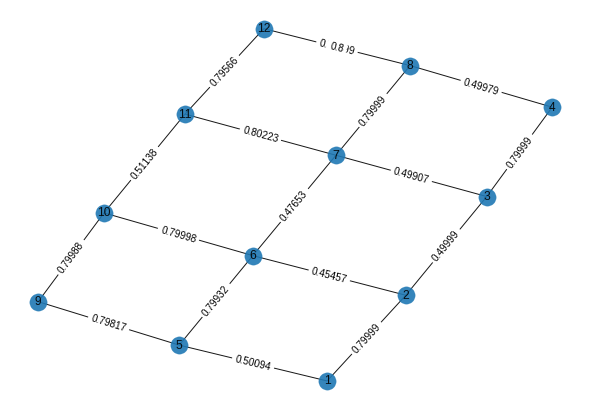

In [13]:
#Display discovered clusters
#truncate fcn from https://stackoverflow.com/questions/8595973/truncate-to-three-decimals-in-python/49845864
import math
def trunc(number, digits) -> float:
    stepper = pow(10.0, digits)
    return math.trunc(stepper * number) / stepper
G = nx.Graph()
plt.figure()
edges = [[1,2],[1,5],[2,1],[2,3],[3,2],[3,4],[4,3],[4,8],[5,1],[5,6],[5,9],[6,2],
         [6,5],[6,7],[6,10],[7,3],[7,6],[7,8],[7,11],[8,4],[8,7],[8,12],[9,5],
        [9,10],[10,6],[10,9],[10,11],[11,7],[11,10],[11,12],[12,8],[12,11]]
edge_labels = dict()
for edge in edges:
  edge_labels[(edge[0],edge[1])] = trunc(agent_matrix[edge[0]-1][edge[1]-1],5)
G.add_nodes_from(range(1,13))
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.spring_layout(G,pos=pos,weight='labels')
nx.draw(G,pos,alpha=0.9,labels={node:node for node in G.nodes()})
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
plt.show()                        

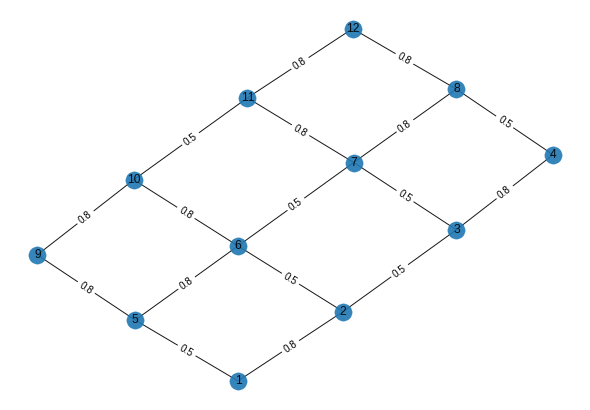

In [14]:
# actual world graph
G = nx.Graph()
plt.figure()
edges = [[1,2],[1,5],[2,1],[2,3],[3,2],[3,4],[4,3],[4,8],[5,1],[5,6],[5,9],[6,2],
         [6,5],[6,7],[6,10],[7,3],[7,6],[7,8],[7,11],[8,4],[8,7],[8,12],[9,5],
        [9,10],[10,6],[10,9],[10,11],[11,7],[11,10],[11,12],[12,8],[12,11]]
edge_labels = dict()
for edge in edges:
  edge_labels[(edge[0],edge[1])] = trunc(real_world_matrix[edge[0]-1][edge[1]-1],5)
G.add_nodes_from(range(1,13))
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.spring_layout(G,pos=pos,weight='labels')
nx.draw(G,pos,alpha=0.9,labels={node:node for node in G.nodes()})
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
plt.show()                        

In [16]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[0,0],[1.25,0],[3.25,0],[4.5,0],[0,2],[1.25,2],[3.25,2],[4.5,2],[0,3.25],[1.25,3.25],[3.25,3.25],[4.5,3.25]])
kmeans = KMeans(n_clusters=4).fit(X)
kmeans.labels_

array([3, 3, 0, 0, 1, 1, 2, 2, 1, 1, 2, 2], dtype=int32)

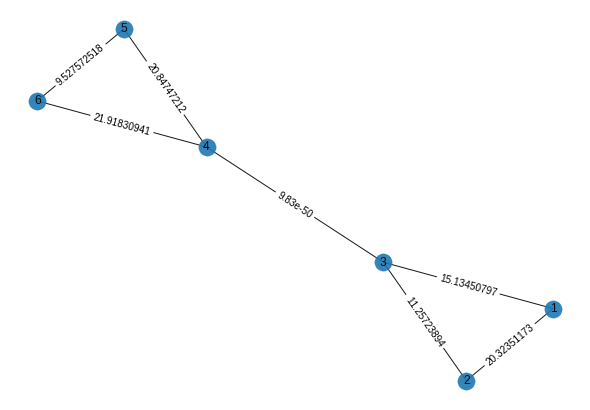

In [19]:
# actual world graph from matlab model
G = nx.Graph()
plt.figure()
edges = [[1,2],[1,3],[2,3],[3,4],[4,5],[4,6],[5,6]]
edge_labels = dict()
edge_labels[1,2] = 20.32351173
edge_labels[1,3] = 15.13450797
edge_labels[2,3] = 11.25723894
edge_labels[3,4] = 9.83e-50
edge_labels[4,5] = 20.84747212
edge_labels[4,6] = 21.91830941
edge_labels[5,6] = 9.527572518
G.add_nodes_from(range(1,6))
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.spring_layout(G,pos=pos,weight='labels')
nx.draw(G,pos,alpha=0.9,labels={node:node for node in G.nodes()})
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
plt.show()                        